# Pymaceuticals Inc.
---

### Analysis
- At the start of the analysis, there is a mouse_id with duplicated timepoints for the same drug, which could be incorrectly noted data and can affect the final data. The data for this mouse is dropped and a new dataframe without the mouse is created.
- We then look at the mean, median, std. dev and std. err on for each drug for all the mice over all timepoints. Here we can see which drug contributes to the largest and smallest tumours. In this case, Ketapril gives the largest tumor volumes given the mean and median data.
- In the Pie and Bar charts section, bar charts are provided to show the number of timepoints for each drug, in descending order. The pie charts show an almost even distribution between male and female Mice.
- In the ‘Quartiles, Outliers and Boxplots’, datapoints are taken for each mouse on each for the final timepoints. The IQR and final tumor is calculated across four drugs, Capomulin, Ramicane, Infubinol and Ceftamin. The only drug with an outlier is Infubinol, every other drug has points that fall within the IQR. This was attributed to mouse c326, female, and 18 months old.
- In the Line and Scatter plots section, we examine the capomulin treatment of mouse l509. Looking at the Tumor Volume, the tumor volume starts to decrease at around 20 days. We also see a positive correlation between the average tumor volume for Capomulin and the weight of the mice. The Tumor Volume is higher as the weight increases.

 

In [53]:
# imports
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st

# file paths
mouse_metadata_path = 'Pymaceuticals/data/Mouse_metadata.csv'
study_results_path = 'Pymaceuticals/data/Study_results.csv'

# reading in the paths
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#combine data
data = study_results.merge(mouse_metadata, how='left', on = 'Mouse ID')
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [54]:
# number of mice
print(f'The number of mice based on the number of IDs are {len(mouse_metadata)}')

The number of mice based on the number of IDs are 249


In [55]:
# duplicated rows based on Mouse ID, Timepoint, Drug
duplicate_mouse_id = data[data.duplicated(subset = ['Mouse ID', 'Timepoint', 'Drug Regimen'])]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# duplicated row
duplicate_mouse_id = data[data.duplicated()]['Mouse ID']
print(f'The duplicated mouse ID(s) are {duplicate_mouse_id.iloc[0]} at index {duplicate_mouse_id.index[0]}')
data.loc[[duplicate_mouse_id.index[0]]]

The duplicated mouse ID(s) are g989 at index 137


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [57]:
# All the data for the duplicated mouse id
data.loc[data['Mouse ID'] == duplicate_mouse_id.iloc[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
#remove single row of data for duplicated mouse
# data = data.drop_duplicates()
#remove all data for duplicated mouse values
data = data.drop((data[data['Mouse ID'] == duplicate_mouse_id.iloc[0]]).index)


In [59]:
print('The number of mice in the new dataframe are:')
len(data['Mouse ID'].unique())

The number of mice in the new dataframe are:


248

## Summary Statistics

In [60]:
# create an empty dataframe
data_summary = pd.DataFrame()

# groupby and append mean, median, std.dev and std.err colums to dataframe
data_summary['Mean Tumor Volume'] = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
data_summary['Median Tumor Volume'] = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
data_summary['Tumor Volume Std. Dev'] = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
data_summary['Tumor Volume Std.Err'] = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
data_summary['Variance'] = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev,Tumor Volume Std.Err,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


In [62]:
# Using .agg method
# create an empty dataframe
data_summary = pd.DataFrame()

data_summary = data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem', 'var']
})
data_summary.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Std. Dev', 'Tumor Volume Std.Err', 'Variance']
data_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev,Tumor Volume Std.Err,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar and Pie Charts

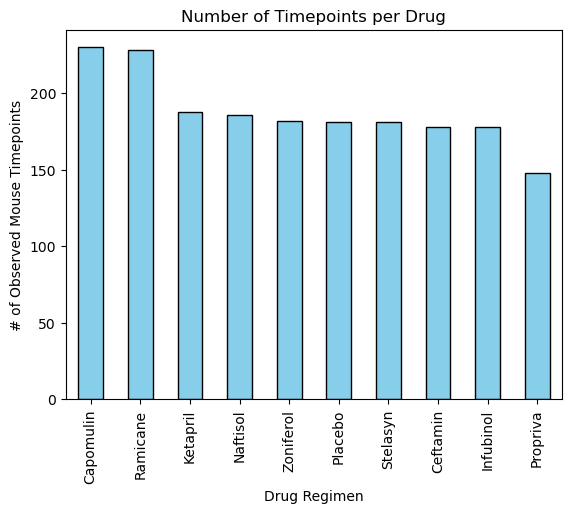

In [20]:
# Total number of rows by Timepoing and Drug
timepoint_data = data.groupby('Drug Regimen')['Timepoint'].count()
timepoint_data.sort_values(ascending=False, inplace=True)
timepoint_data.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Timepoints per Drug')

plt.show()

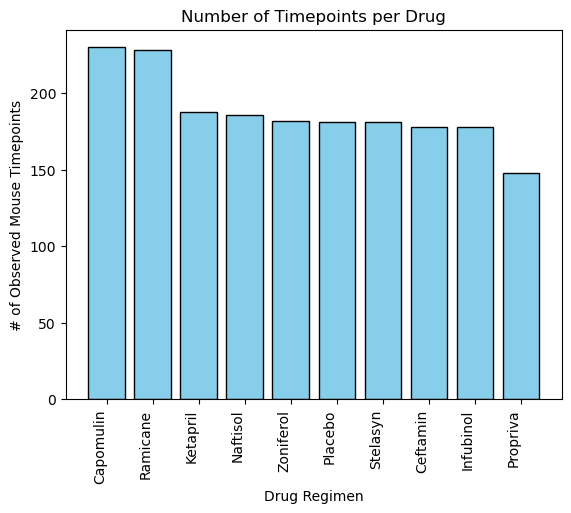

In [21]:
# plt using matplotlib
plt.bar(timepoint_data.index, timepoint_data, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Timepoints per Drug')

plt.xticks(rotation=90, ha='right')

plt.show()

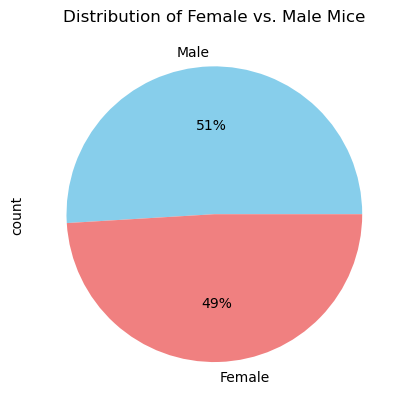

In [22]:
# pie plot of the distribution of males vs females
data['Sex'].value_counts().plot(kind = 'pie', autopct='%1.f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs. Male Mice')
plt.show()


([<matplotlib.patches.Wedge at 0x28c4a9610>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51%'),
  Text(0.018044734954153686, -0.5997285948997549, '49%')])

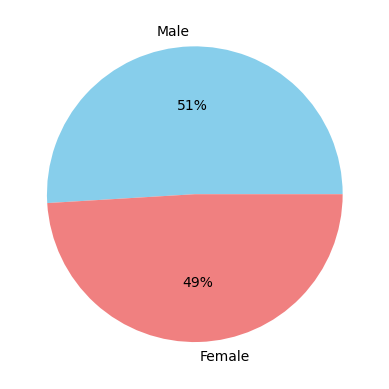

In [23]:
# plot using matplotlib
plt.pie(data['Sex'].value_counts(), 
        labels = data['Sex'].value_counts().index, 
        autopct = '%1.f%%', 
        colors=['skyblue', 'lightcoral'])

## Quartiles, Outliers and Boxplots

In [24]:
# finding the max/final timepoint for each mouse
mouse_id = data.groupby('Mouse ID')['Timepoint'].max()
mouse_id = mouse_id.reset_index()


In [25]:
# merging final timepoint with original dataset
final_timepoint = mouse_id.merge(data, how = 'left', 
                                 on = ['Mouse ID', 'Timepoint'])
final_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = final_timepoint.loc[final_timepoint['Drug Regimen'] == 'Capomulin'].reset_index()
infubinol = final_timepoint.loc[final_timepoint['Drug Regimen'] == 'Infubinol'].reset_index()
ramicane = final_timepoint.loc[final_timepoint['Drug Regimen'] == 'Ramicane'].reset_index()
ceftamin = final_timepoint.loc[final_timepoint['Drug Regimen'] == 'Ceftamin'].reset_index()

treatment_name = ['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin']
treatments = [capomulin, infubinol, ramicane, ceftamin]
tum_vol_data = []
iqr_list = []

for i, treatment in enumerate(treatments):
    tum_vol = treatment['Tumor Volume (mm3)'].rename(treatment_name[i])
    tum_vol_data.append(tum_vol)

    iqr = st.iqr(tum_vol)
    lowerq = tum_vol.quantile([0.25])[0.25]
    upperq = tum_vol.quantile([0.75])[0.75]
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    print(f'{treatment_name[i]}\'s potential outliers',
        treatment.loc[(treatment['Tumor Volume (mm3)'] < lower_bound) 
                  | (treatment['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)'])

# print(treatment.loc[(treatment['Tumor Volume (mm3)'] < lower_bound) 
#                   | (treatment['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)'])



Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


In [64]:
print('Outlier in Infubinol:')
infubinol.iloc[5]

Outlier in Infubinol:


index                        31
Mouse ID                   c326
Timepoint                     5
Tumor Volume (mm3)    36.321346
Metastatic Sites              0
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Name: 5, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x28c0e9b90>,
 'caps': [<matplotlib.lines.Line2D at 0x28c0e8110>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c0dc610>,
 'medians': [<matplotlib.lines.Line2D at 0x28c0e8cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x28c0eb210>,
 'means': []}

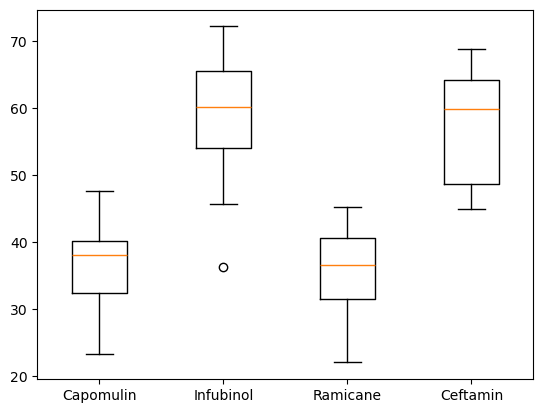

In [27]:
# Generate a box plot that shows the distrubuti[on of the tumor volume for each treatment group.
plt.boxplot(tum_vol_data, labels = treatment_name)

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

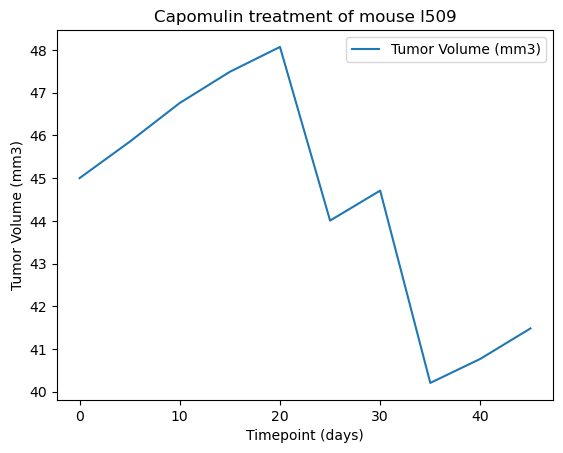

In [45]:
mouse_l509 = data.loc[data['Mouse ID']=="l509"]
mouse_l509.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)', 
                title = 'Capomulin treatment of mouse l509', 
                xlabel = 'Timepoint (days)', 
                ylabel = 'Tumor Volume (mm3)')


In [29]:
capomulin_all = data.loc[data['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_all.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_grouped = capomulin_grouped.reset_index()
capomulin_grouped = capomulin_grouped.rename(columns = {'Tumor Volume (mm3)': 'Average Tumor Volume'})
capomulin_merge = capomulin_all.merge(capomulin_grouped,
                                      how = 'right',
                                      on = 'Mouse ID')


<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume'>

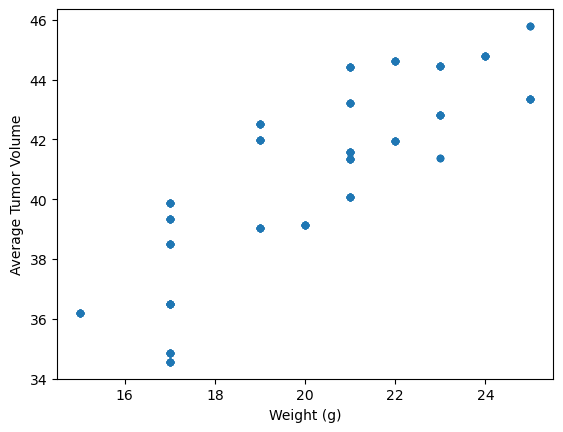

In [30]:
capomulin_merge.plot(kind = 'scatter',
                       x = 'Weight (g)' ,
                       y = 'Average Tumor Volume',
               xlabel = 'Weight (g)',
               ylabel = 'Average Tumor Volume')

## Correlation and Regression

In [31]:
#linear regression
x_val = capomulin_merge['Weight (g)']
y_val = capomulin_merge['Average Tumor Volume']
capo_slope, capo_x_int, capo_r, capo_p, capo_std_err = st.linregress(x_val, y_val)


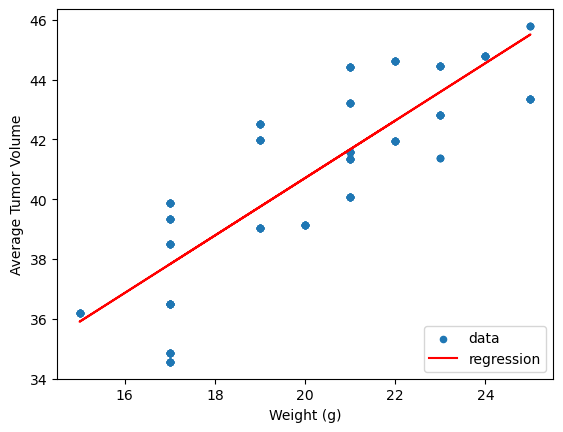

In [32]:
fit = capo_slope * x_val + capo_x_int
capomulin_merge.plot(kind = 'scatter',
                       x = 'Weight (g)' ,
                       y = 'Average Tumor Volume',
               xlabel = 'Weight (g)',
               ylabel = 'Average Tumor Volume',
               label = 'data')
plt.plot(x_val, fit, color = 'red',label = 'regression')
plt.legend(loc = 'lower right')
plt.show()